# --- Day 12: Subterranean Sustainability ---

In [92]:
with open('input/day12.txt') as f:
    initial = f.readline().strip().split(' ')[-1]
    rules = [l.strip() for l in f.readlines()[1:]]

In [93]:
from collections import defaultdict

In [94]:
rls = defaultdict(lambda: None)
for r in rules:
    l = r.split(' ')
    rls[l[0]] = l[-1]

In [134]:
def sumplantpots(generations, generation):
    sum = 0
    for i, s in enumerate(generations[generation]):
        if s == '#':
            sum += i-2*generation
    return sum

In [138]:
generations = {0: initial}
for g in range(20):
    test = '....'+generations[g]+'....'
    r = ''
    for i in range(len(test)-4):
        t = test[i:i+5]
        if rls[t]:
            r += rls[t]
        else:
            r += '.'
    generations[g+1] = r

In [137]:
sumplantpots(generations, 20)

3421

In [103]:
testinitial = '#..#.#..##......###...###'
testrules = '''...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #'''

In [104]:
testrls = defaultdict(lambda: None)
for r in testrules.splitlines():
    l = r.split(' ')
    testrls[l[0]] = l[-1]

In [131]:
testgenerations = {0: testinitial}
for g in range(20):
    test = '....'+testgenerations[g]+'....'
    r = ''
    for i in range(len(test)-4):
        t = test[i:i+5]
        if testrls[t]:
            r += testrls[t]
        else:
            r += '.'
    testgenerations[g+1] = r

In [135]:
sumplantpots(testgenerations, 20)

325

## --- Part Two ---

OK... there must be a trend because I'm not going to be able to run that many generations...

Let's rewrite some of the loops into functions:

In [144]:
def sumgen(state, generation):
    sum = 0
    for i, s in enumerate(state):
        if s == '#':
            sum += i-2*generation
    return sum

def growplants(initial, rules, generation):
    state = initial
    for g in range(generation):
        test = '....'+state+'....'
        r = ''
        for i in range(len(test)-4):
            t = test[i:i+5]
            if rules[t]:
                r += rules[t]
            else:
                r += '.'
        state = r
    return sumgen(state, generation)

Now check for a trend:

In [166]:
trend = []
for i in range(500):
    trend.append(growplants(initial, rls, i))

In [150]:
import matplotlib.pyplot as plt

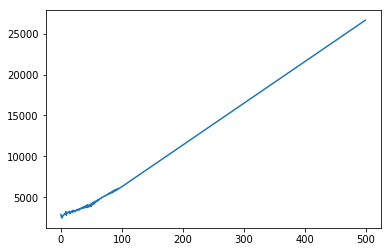

In [167]:
plt.plot(trend)

it seems there is from approximately generation 100

In [171]:
slope = (trend[490]-trend[100])/390
start = trend[100]-slope*100

In [173]:
(start+slope*400) == trend[400]

True

In [174]:
start+slope*50000000000

2550000001195.0